In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS

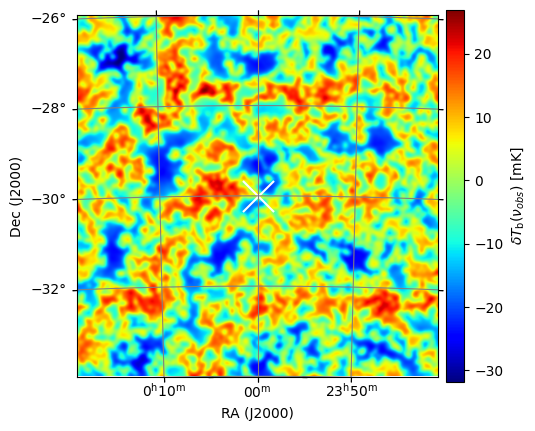

(None, None)

<Figure size 640x480 with 0 Axes>

In [6]:
fits_file = './lc_256_train_130923_i0_dT_ch600_4h1d_256-dirty.fits'

# read fits file and store header, WCS and the data
data, header = fits.getdata(fits_file, header=True)
w = WCS(header).celestial

# calculated beam of SKA-Low
bmaj, bmin = header['BMAJ']*u.deg, header['BMIN']*u.deg
fwhm_to_sigma = 1./(8*np.log(2))**0.5
solid_beam = (2.*np.pi*bmaj*bmin*fwhm_to_sigma**2).to('sr')

# get observed frequency
freq = header['CRVAL3']*u.Hz

# calcualte the convertion Jy/beam to mK
equiv = u.brightness_temperature(frequency=freq)
Jyb2K = (u.Jy/solid_beam).to(u.mK, equivalencies=equiv)
data = data.squeeze() * Jyb2K.value

# get coordinate field center
coords = SkyCoord(ra=header['CRVAL1'], dec=header['CRVAL2'], frame='fk5', unit='deg')
field_center = w.all_world2pix(coords.data.lon, coords.data.lat, 1)

# create an image with projection
plt.figure(figsize=(5,5))
plt.subplot(projection=w.celestial)

# plot the fits file
im = plt.imshow(data, cmap='jet')
plt.colorbar(im, label=r'$\delta T_\mathrm{b}(\nu_{obs})$ [mK]', pad=0.02, fraction=0.048)

# plot the coordinates of the field center
plt.scatter(field_center[0], field_center[1], s=500, marker='x', color='white')

plt.xlabel('RA (J2000)'), plt.ylabel('Dec (J2000)')
plt.grid(color='grey', ls='solid')
plt.show(), plt.clf()
